In [189]:
import sys
sys.path.append('../../alg')
import distance_buffer as db

from shapely.geometry import Polygon
from shapely.geometry import LinearRing
from shapely.geometry import LineString
from shapely.geometry import Point

import numpy as np

from scipy.spatial.distance import euclidean

from math import sqrt
from math import floor
from matplotlib import pyplot
from matplotlib.patches import Circle
from descartes.patch import PolygonPatch

In [292]:
from shapely.geometry import MultiPolygon

In [344]:
reload(db)

<module 'distance_buffer' from '../../alg/distance_buffer.pyc'>

In [346]:
def poly_loop(poly, r):
    candpts = []
    candpts.append(db.find_cand_points_list_ref(list(poly.exterior.coords),10.0))
    for i in range(0, len(poly.interiors)):
        candpts.append(db.find_cand_points_list_ref(list(poly.interiors[i].coords),10.0))
    
    return candpts
        
    # and process exterior

In [347]:
def buffer_loop(buffers, r):
    candpts = []
    for i in range(0, len(buffers)):
        if isinstance(buffers[i], Polygon):
            print "poly"
            candpts.append(poly_loop(buffers[i], r))
        elif isinstance(buffers[i], MultiPolygon):
            print "multi"
            for j in range(0, len(buffers[i])):
                candpts.append(poly_loop(buffers[i].geoms[j], r))
    return candpts
        

In [415]:
def plot_fig():
    fig = pyplot.figure(1, figsize=(20,20), dpi=90)
    ax = fig.add_subplot(222)
    ax.axis('equal')
    db.plot_coords(ax, targetArea.interiors[0])
    db.plot_coords(ax, targetArea.exterior)
    patch = PolygonPatch(targetArea, facecolor='#6699cc', edgecolor='#6699cc', alpha=0.1, zorder=2)
    ax.add_patch(patch)
    return ax, fig


In [379]:

## distance fig



targetArea = Polygon([(0,0),(0,400),(400,400),(400,0)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])
print targetArea.area



## buffer fig
buffers = db.gen_dist_buffers(10.0, targetArea)



#db.plot_coords_list(ax, pts_buffer1, color="#000000", zorder=3)

155778.0


In [380]:
candpts = buffer_loop(buffers, 10.0)

poly
LINE EQ: 
vertical line x = 0.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.025 -0.025
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.025641025641 -0.025641025641
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0263157894737 -0.0263157894737
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.027027027027 -0.027027027027
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0277777777778 -0.0277777777778
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0285714285714 -0.0285714285714
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0294117647059 -0.0294117647059
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0303030303

ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.332465855208 -0.332465855208
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.498050710667 -0.498050710667
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.992233122452 -0.992233122452
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
127.751868929 -127.751868929
no intercept (there would be one if the line segment cont'd)
poly
LINE EQ: 
vertical line x = 15.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.027027027027 -0.027027027027
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0277777777778 -0.0277777777778
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0285714285714 -0.0285714285714
ENTERING PT SEG CIRCLE ENTERING

LINE EQ: 
y = 0.701009700417*x + -51.9067653175
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.366588507731 -12.0239479291
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
10.4264007906 -10.4264007906
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 0.863696486908*x + -82.9442768017
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
5.97370909677 -7.23407757971
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 1.05759182525*x + -119.713588044
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
4.98482889756 -8.21570958669
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 1.29803497854*x + -165.059849765
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
4.00682911293 -9.16510907691
no intercept (th

no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = 1.05515113656*x + -54.3490923978
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
5.20992003605 -8.13856255624
no intercept (there would be one if the line segment cont'd)
poly
LINE EQ: 
vertical line x = 30.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0294117647059 -0.0294117647059
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.030303030303 -0.030303030303
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.03125 -0.03125
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0322580645161 -0.0322580645161
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0333333333333 -0.0333333333333
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT S

y = -1.65181105899*x + 349.420588425
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.14393797827 -4.50383193258
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -1.33023515472*x + 303.160963984
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.15249782147 -5.46295381766
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -1.2*x + 284.661498055
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0147701794125 -0.617764375311
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.324890896665 -0.324890896665
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.481242061558 -0.481242061558
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.927681344027 -0.927681344027
ENTERING PT SEG 

LINE EQ: 
y = -1.2*x + 308.092247083
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.104636853461 -0.534539267763
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.35749986033 -0.35749986033
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.55641989512 -0.55641989512
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
1.25438424537 -1.25438424537
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -1.08925907621*x + 293.300586591
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.470408832915 -4.16118088102
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
4.37599496002 -4.37599496002
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.89883124899*x + 268.420848743
ENTERING PT 

ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0973984776584 -0.0973984776584
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.107908612214 -0.107908612214
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.120961387692 -0.120961387692
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.137606455505 -0.137606455505
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.159563410908 -0.159563410908
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.18985776319 -0.18985776319
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.234351147939 -0.234351147939
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.306081759684 -0.306081759684
ENTERING

0.0587837792996 -0.0587837792996
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0624551277451 -0.0624551277451
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0666156144557 -0.0666156144557
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0713699687797 -0.0713699687797
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0768551160099 -0.0768551160099
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0832535795223 -0.0832535795223
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0908141855399 -0.0908141855399
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.0998851764904 -0.0998851764904
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG 

ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.842364729459 -0.895743890176
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
5.51309425409 -5.51309425409
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
y = -0.157905968749*x + 255.979826836
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
2.39554658503 -3.45138341902
no intercept (there would be one if the line segment cont'd)
LINE EQ: 
vertical line x = 120.0
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.17674422603 -0.222668586434
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.282690416511 -0.282690416511
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE 
0.394098201136 -0.394098201136
ENTERING PT SEG CIRCLE ENTERING PT SEG CIRCLE ENTERING PT

In [419]:
ax, fig = plot_fig()
#db.plot_dist_buffers(ax, buffers)

In [420]:
for i in range(0,len(candpts)):
    #print list(candpts[i])
    for j in range(0, len(candpts[i])):
        db.plot_coords_list(ax, candpts[i][j], color="#000000", zorder="3" )
        db.plot_radii(ax, candpts[i][j], 10.0, color="#999999", zorder=1, alpha=0.3)
        #print "\t"+str(len(candpts[i][j]))
        #for k in range(0, len(candpts[i][j])):
            
            
            #print "\t\t"+str(len(candpts[i][j][k]))
            #print list(candpts[i][j][k])


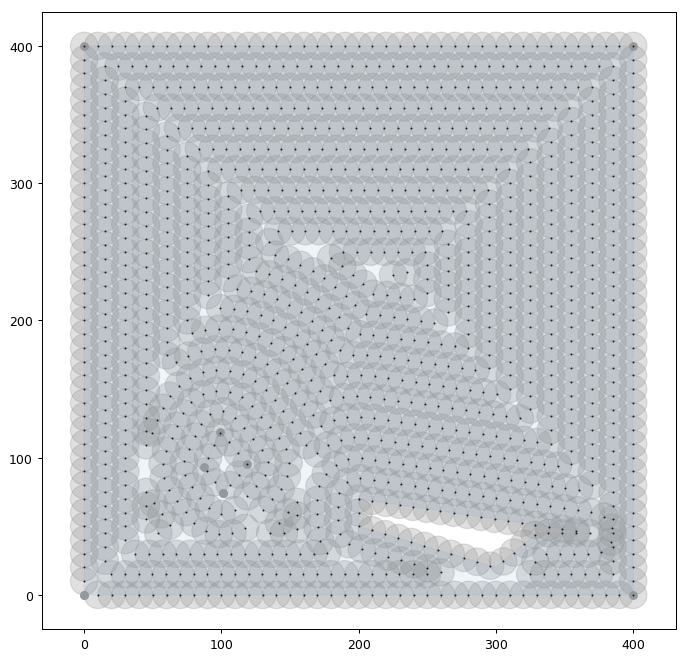

In [421]:
pyplot.show()